In [108]:
import warnings
warnings.filterwarnings("ignore")
from utils import aspect_extraction, general, sentiment_extraction, visualizer
import pickle
import pandas as pd

In [109]:
import importlib
importlib.reload(general)
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(visualizer)

<module 'utils.visualizer' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/visualizer.py'>

In [110]:
def get_aspects_polarity(pmi):
    pmi["pmi_combined"] = 2*pmi["noun_cat_pmi"]+ pmi["adj_noun_pmi"]
    pmi = pmi[["noun", "adj", "pmi_combined"]]
    pmi["polarity"] = pmi["adj"].apply(lambda x : sentiment_extraction.get_sentiwn_score(x))
    pmi = pmi.sort_values(by = "pmi_combined", ascending=False)[:1000]
    pos = len(pmi[pmi.polarity >= 0.2])
    neg = len(pmi[pmi.polarity < -0.2])
    avg = pmi[abs(pmi.polarity) > 0.2]["polarity"].mean()
    return pmi, (pos/(pos+neg))*100, (neg/(pos+neg))*100, avg

In [111]:
queries_aspects = {}
aspects_polarity = {}

def save_results(app, aspect, queries_aspects, aspects_polarity, pmi, pos, neg, avg):
    if app not in queries_aspects:
        queries_aspects[app] = {}
    if app not in aspects_polarity:
        aspects_polarity[app] = {}

    aspects = list(pmi[abs(pmi.polarity) > 0.2][["noun", "adj"]].itertuples(index=False, name = None))
    queries_aspects[app][aspect] = aspects
    aspects_polarity[app][aspect] = {}
    aspects_polarity[app][aspect]["pos"] = pos
    aspects_polarity[app][aspect]["neg"] = neg
    aspects_polarity[app][aspect]["avg"] = avg
    return queries_aspects, aspects_polarity

## __Tinder__

In [112]:
tinder_reviews_by_category = aspect_extraction.get_reviews_by_category(app = "tinder", categories = ["casual sex", "relationship", "friendship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"])
tinder_word_category_pmi = aspect_extraction.get_noun_category_pmi(tinder_reviews_by_category)
tinder_word_category_pmi.head()

  0%|          | 0/577214 [00:00<?, ?it/s]

,category,noun,noun_cat_pmi
0,attractiveness,a,0.501333
1,attractiveness,aap,0.709722
2,attractiveness,account,0.639157
3,attractiveness,accounts,0.486562
4,attractiveness,after,0.588550


### __Casual sex__

In [113]:
casual_sex_reviews = tinder_reviews_by_category["casual sex"]

In [114]:
cs_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(casual_sex_reviews)
cs_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "casual sex"].merge(cs_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20295 [00:00<?, ?it/s]

In [115]:
cs_pmi, cs_pos, cs_neg, cs_avg = get_aspects_polarity(cs_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="casual sex", pmi= cs_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cs_pos, neg=cs_neg, avg=cs_avg)
print(f"pos: {cs_pos:.2f}%, neg: {cs_neg:.2f}% avg: {cs_avg}")
cs_pmi.head()

pos: 41.34%, neg: 58.66% avg: -0.0828588484273373


,noun,adj,pmi_combined,polarity
7220,need,screen,2.424476,0.007812
9983,prostitution,illegal,2.390899,0.000000
14353,weeks,escort,2.390394,-0.041667
10287,rate,catfish,2.285821,0.000000
13031,thanks,safe,2.189139,0.160714


### __Relationship__

In [116]:
relationship_reviews = tinder_reviews_by_category["relationship"]

In [117]:
rel_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(relationship_reviews)
rel_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "relationship"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20458 [00:00<?, ?it/s]

In [118]:
rel_pmi, rel_pos, rel_neg, rel_avg = get_aspects_polarity(rel_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="relationship", pmi= rel_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= rel_pos, neg=rel_neg, avg=rel_avg)
print(f"pos: {rel_pos:.2f}%, neg: {rel_neg:.2f}%, avg: {rel_avg}")
rel_pmi.head()

pos: 50.00%, neg: 50.00%, avg: 0.011086045564655193


,noun,adj,pmi_combined,polarity
5073,list,entire,2.425769,0.100000
11828,tons,bumble,2.177573,-0.250000
5084,list,active,2.079449,0.022059
5074,list,difficult,2.079449,-0.687500
1002,build,potential,2.075009,-0.125000


### __Friendship__

In [119]:
friendship_reviews = tinder_reviews_by_category["friendship"]

In [120]:
friend_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(friendship_reviews)
friend_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "friendship"].merge(friend_adj_noun_pmi, on = ["noun"])

  0%|          | 0/17716 [00:00<?, ?it/s]

In [121]:
friend_pmi, friend_pos, friend_neg, friend_avg = get_aspects_polarity(friend_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="friendship", pmi= friend_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= friend_pos, neg=friend_neg, avg=friend_avg)
print(f"pos: {friend_pos:.2f}%, neg: {friend_neg:.2f}%, avg: {friend_avg}")
friend_pmi.head()

pos: 44.09%, neg: 55.91%, avg: -0.0706109442389277


,noun,adj,pmi_combined,polarity
1587,friendship,genuine,1.972835,0.117667
1617,friendship,random,1.962869,0.125000
1616,friendship,simple,1.962869,0.000000
1594,friendship,social,1.962869,-0.017857
1624,friendship,dislike,1.962869,-0.375000


### __Curiosity__

In [122]:
curiosity_reviews = tinder_reviews_by_category["curiosity"]

In [123]:
cur_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(curiosity_reviews)
cur_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "curiosity"].merge(cur_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19404 [00:00<?, ?it/s]

In [124]:
cur_pmi, cur_pos, cur_neg, cur_avg = get_aspects_polarity(cur_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="curiosity", pmi= cur_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cur_pos, neg=cur_neg, avg=cur_avg)
print(f"pos: {cur_pos:.2f}%, neg: {cur_neg:.2f}%, avg: {cur_avg}")
cur_pmi.head()

pos: 50.67%, neg: 49.33%, avg: -0.0018042697512033316


,noun,adj,pmi_combined,polarity
868,curiosity,funny,2.089236,-0.150
853,curiosity,missed,2.068183,-0.125
854,curiosity,sudden,2.068183,-0.500
825,curiosity,total,2.054148,0.000
871,curiosity,random,2.036604,0.125


### __Women__

In [125]:
women_reviews = tinder_reviews_by_category["women"]

In [126]:
women_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(women_reviews)
women_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "women"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20900 [00:00<?, ?it/s]

In [127]:
women_pmi, women_pos, women_neg, women_avg = get_aspects_polarity(women_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="women", pmi= women_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= women_pos, neg=women_neg, avg=women_avg)
print(f"pos: {women_pos:.2f}%, neg: {women_neg:.2f}%, avg: {women_avg}")
women_pmi.head()

pos: 45.21%, neg: 54.79%, avg: -0.013546882992550479


,noun,adj,pmi_combined,polarity
1550,ego,sad,2.655782,-0.625000
1523,ego,social,2.395302,-0.017857
1584,ego,personal,2.353439,0.083333
1563,ego,write,2.285412,0.000000
1572,ego,expensive,2.285412,0.500000


### __Men__

In [128]:
men_reviews = tinder_reviews_by_category["men"]

In [129]:
men_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(men_reviews)
men_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "men"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21816 [00:00<?, ?it/s]

In [130]:
men_pmi, men_pos, men_neg, men_avg = get_aspects_polarity(men_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="men", pmi= men_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= men_pos, neg=men_neg, avg=men_avg)
print(f"pos: {men_pos:.2f}%, neg: {men_neg:.2f}%, avg: {men_avg}")
men_pmi.head()

pos: 45.76%, neg: 54.24%, avg: -0.016791618132972863


,noun,adj,pmi_combined,polarity
11961,trans,quick,2.157115,0.000000
11966,trans,romantic,2.157115,0.075000
11952,trans,separate,2.089088,-0.065789
10058,settings,romantic,2.089088,0.075000
10057,settings,bunch,2.089088,-0.025000


### __Self Esteem__

In [131]:
self_esteem_reviews = tinder_reviews_by_category["self esteem"]

In [132]:
self_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(self_esteem_reviews)
self_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "self esteem"].merge(self_adj_noun_pmi, on = ["noun"])

  0%|          | 0/17100 [00:00<?, ?it/s]

In [133]:
self_pmi, self_pos, self_neg, self_avg = get_aspects_polarity(self_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="self", pmi= self_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= self_pos, neg=self_neg, avg=self_avg)
print(f"pos: {self_pos:.2f}%, neg: {self_neg:.2f}%, avg: {self_avg}")
self_pmi.head()

pos: 43.57%, neg: 56.43%, avg: -0.05750770879526898


,noun,adj,pmi_combined,polarity
4921,subscribe,sad,2.134254,-0.625000
4883,subscribe,login,2.037031,0.000000
4865,subscribe,real,2.023142,0.009615
4875,subscribe,premium,2.019670,0.000000
4876,subscribe,delete,2.019670,-0.041667


### __Attractiveness (appearence)__

In [134]:
attractiveness_reviews = tinder_reviews_by_category["attractiveness"]

In [135]:
attr_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(attractiveness_reviews)
attr_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "attractiveness"].merge(attr_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20564 [00:00<?, ?it/s]

In [136]:
attr_pmi, attr_pos, attr_neg, attr_avg = get_aspects_polarity(attr_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="attractiveness", pmi= attr_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= attr_pos, neg=attr_neg, avg=attr_avg)
print(f"pos: {attr_pos:.2f}%, neg: {attr_neg:.2f}%, avg: {attr_avg}")
attr_pmi.head()

pos: 43.14%, neg: 56.86%, avg: -0.0629858189507603


,noun,adj,pmi_combined,polarity
404,attractiveness,previous,2.287804,-0.166667
382,attractiveness,attractive,2.229471,0.416667
349,attractiveness,algorithm,2.171137,0.000000
364,attractiveness,spent,2.162804,0.125000
403,attractiveness,actual,2.141971,0.075000


### __Attractiveness (intelligence)__

In [137]:
intelligence_reviews = tinder_reviews_by_category["intelligence"]

In [138]:
int_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(intelligence_reviews)
int_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "intelligence"].merge(int_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19691 [00:00<?, ?it/s]

In [139]:
int_pmi, int_pos, int_neg, int_avg = get_aspects_polarity(int_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="intelligence", pmi= int_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= int_pos, neg=int_neg, avg=int_avg)
print(f"pos: {int_pos:.2f}%, neg: {int_neg:.2f}%, avg: {int_avg}")
int_pmi.head()

pos: 40.43%, neg: 59.57%, avg: -0.09228366321317331


,noun,adj,pmi_combined,polarity
2363,intelligence,artificial,2.444444,-0.333333
2398,intelligence,smart,2.222222,0.083333
2359,intelligence,horrible,2.133333,-0.625000
2364,intelligence,uninstall,2.098765,0.000000
2375,intelligence,potential,2.063492,-0.125000


## __Bumble__

In [140]:
bumble_reviews_by_category = aspect_extraction.get_reviews_by_category(app = "bumble", categories = ["casual sex", "relationship", "friendship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"])
bumble_word_category_pmi = aspect_extraction.get_noun_category_pmi(bumble_reviews_by_category)
bumble_word_category_pmi.head()

  0%|          | 0/102380 [00:00<?, ?it/s]

,category,noun,noun_cat_pmi
0,attractiveness,a,0.420972
1,attractiveness,absolutely,0.494088
2,attractiveness,access,0.529772
3,attractiveness,account,0.529595
4,attractiveness,accounts,0.490613


### __Casual sex__

In [141]:
casual_sex_reviews = bumble_reviews_by_category["casual sex"]

In [142]:
cs_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(casual_sex_reviews)
cs_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "casual sex"].merge(cs_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18786 [00:00<?, ?it/s]

In [143]:
cs_pmi, cs_pos, cs_neg, cs_avg = get_aspects_polarity(cs_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="casual sex", pmi= cs_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cs_pos, neg=cs_neg, avg=cs_avg)
print(f"pos: {cs_pos:.2f}%, neg: {cs_neg:.2f}%, avg: {cs_avg}")
cs_pmi.head()

pos: 43.17%, neg: 56.83%, avg: -0.05833517195361265


,noun,adj,pmi_combined,polarity
5011,internet,solid,2.152309,0.034722
6300,members,initial,2.113028,0.000000
6293,members,horrible,2.095744,-0.625000
6288,members,bunch,2.081602,-0.025000
6246,members,opposite,2.056855,0.034091


### __Relationship__

In [144]:
relationship_reviews = bumble_reviews_by_category["relationship"]

In [145]:
rel_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(relationship_reviews)
rel_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "relationship"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19600 [00:00<?, ?it/s]

In [146]:
rel_pmi, rel_pos, rel_neg, rel_avg = get_aspects_polarity(rel_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="relationship", pmi= rel_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= rel_pos, neg=rel_neg, avg=rel_avg)
print(f"pos: {rel_pos:.2f}%, neg: {rel_neg:.2f}%, avg: {rel_avg}")
rel_pmi.head()

pos: 45.16%, neg: 54.84%, avg: -0.03131017392704472


,noun,adj,pmi_combined,polarity
5187,lives,black,2.455642,-0.284091
5146,lives,actual,2.255938,0.075000
5191,lives,pick,2.233115,-0.023810
5170,lives,true,2.167181,0.241667
5177,lives,complete,2.167181,0.300000


### __Friendship__

In [147]:
friendship_reviews = bumble_reviews_by_category["friendship"]

In [148]:
friend_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(friendship_reviews)
friend_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "friendship"].merge(friend_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21216 [00:00<?, ?it/s]

In [149]:
friend_pmi, friend_pos, friend_neg, friend_avg = get_aspects_polarity(friend_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="friendship", pmi= friend_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= friend_pos, neg=friend_neg, avg=friend_avg)
print(f"pos: {friend_pos:.2f}%, neg: {friend_neg:.2f}%, avg: {friend_avg}")
friend_pmi.head()

pos: 40.73%, neg: 59.27%, avg: -0.07431557516773722


,noun,adj,pmi_combined,polarity
2846,details,small,2.363764,-0.192308
2848,details,negative,2.363764,-0.489583
2852,details,personal,2.363764,0.083333
2853,details,unsubscribe,2.363764,0.000000
2843,details,actual,2.363764,0.075000


### __Curiosity__

In [150]:
curiosity_reviews = bumble_reviews_by_category["curiosity"]

In [151]:
cur_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(curiosity_reviews)
curiosity_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "curiosity"].merge(cur_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19404 [00:00<?, ?it/s]

In [152]:
cur_pmi, cur_pos, cur_neg, cur_avg = get_aspects_polarity(curiosity_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="curiosity", pmi= cur_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cur_pos, neg=cur_neg, avg=cur_avg)
print(f"pos: {cur_pos:.2f}%, neg: {cur_neg:.2f}%, avg: {cur_avg}")
cur_pmi.head()

pos: 35.17%, neg: 64.83%, avg: -0.12115863243901284


,noun,adj,pmi_combined,polarity
2348,curiosity,used,2.295455,0.083333
2347,curiosity,rare,2.295455,-0.104167
2333,curiosity,write,2.253247,0.000000
8498,play,google,2.182484,-0.062500
2304,curiosity,wanna,2.177273,0.000000


### __Women__

In [153]:
women_reviews = bumble_reviews_by_category["women"]

In [155]:
women_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(women_reviews)
women_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "women"].merge(women_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20972 [00:00<?, ?it/s]

In [156]:
women_pmi, women_pos, women_neg, women_avg = get_aspects_polarity(women_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="women", pmi= women_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= women_pos, neg=women_neg, avg=women_avg)
print(f"pos: {women_pos:.2f}%, neg: {women_neg:.2f}%, avg: {women_avg}")
women_pmi.head()

pos: 45.71%, neg: 54.29%, avg: -0.038402560350549106


,noun,adj,pmi_combined,polarity
6198,nothing,worthless,2.203127,-0.500000
6195,nothing,sad,2.203127,-0.625000
6194,nothing,perfect,2.203127,0.375000
6205,nothing,human,2.203127,0.000000
6170,nothing,rare,2.119794,-0.104167


### __Men__

In [157]:
men_reviews = bumble_reviews_by_category["men"]

In [158]:
men_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(men_reviews)
men_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "men"].merge(men_adj_noun_pmi, on = ["noun"])

  0%|          | 0/22066 [00:00<?, ?it/s]

In [159]:
men_pmi, men_pos, men_neg, men_avg = get_aspects_polarity(men_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="men", pmi= men_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= men_pos, neg=men_neg, avg=men_avg)
print(f"pos: {men_pos:.2f}%, neg: {men_neg:.2f}%, avg: {men_avg}")
men_pmi.head()

pos: 39.93%, neg: 60.07%, avg: -0.09250767333546381


,noun,adj,pmi_combined,polarity
15328,reading,weird,2.607374,-0.083333
691,advantage,average,2.524041,-0.114583
3053,communication,human,2.453528,0.000000
15087,rating,average,2.393089,-0.114583
14975,queue,aware,2.393089,0.562500


### __Self Esteem__

In [160]:
self_reviews = bumble_reviews_by_category["self esteem"]

In [161]:
self_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(self_reviews)
self_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "self esteem"].merge(self_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18518 [00:00<?, ?it/s]

In [162]:
self_pmi, self_pos, self_neg, self_avg = get_aspects_polarity(self_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="self esteem", pmi= self_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= self_pos, neg=self_neg, avg=self_avg)
print(f"pos: {self_pos:.2f}%, neg: {self_neg:.2f}%, avg: {self_avg}")
self_pmi.head()

pos: 41.93%, neg: 58.07%, avg: -0.06829712295208276


,noun,adj,pmi_combined,polarity
9472,success,extra,2.351453,0.017857
712,blm,black,2.277356,-0.284091
9492,success,shot,2.124180,-0.042763
9480,success,tried,2.059245,0.113636
9451,success,initiate,1.917569,0.000000


### __Attractiveness (appearence)__

In [163]:
attractiveness_reviews = bumble_reviews_by_category["attractiveness"]

In [164]:
attr_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(attractiveness_reviews)
attr_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "attractiveness"].merge(attr_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20400 [00:00<?, ?it/s]

In [165]:
attr_pmi, attr_pos, attr_neg, attr_avg = get_aspects_polarity(attr_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="attractiveness", pmi= attr_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= attr_pos, neg=attr_neg, avg=attr_avg)
print(f"pos: {attr_pos:.2f}%, neg: {attr_neg:.2f}%, avg: {attr_avg}")
attr_pmi.head()

pos: 46.23%, neg: 53.77%, avg: -0.03656982433260157


,noun,adj,pmi_combined,polarity
506,attractiveness,physical,2.980050,-0.017857
507,attractiveness,normal,2.387458,-0.025000
485,attractiveness,low,2.288692,-0.250000
438,attractiveness,attractive,2.201546,0.416667
508,attractiveness,honest,2.189927,0.250000


### __Attractiveness (intelligence)__

In [166]:
intelligence_reviews = bumble_reviews_by_category["intelligence"]

In [167]:
int_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(intelligence_reviews)
int_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "intelligence"].merge(int_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19095 [00:00<?, ?it/s]

In [168]:
int_pmi, int_pos, int_neg, int_avg = get_aspects_polarity(int_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="intelligence", pmi= int_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= int_pos, neg=int_neg, avg=int_avg)
print(f"pos: {int_pos:.2f}%, neg: {int_neg:.2f}%, avg: {int_avg}")
int_pmi.head()

pos: 36.09%, neg: 63.91%, avg: -0.13938759034928858


,noun,adj,pmi_combined,polarity
730,blm,black,2.098629,-0.284091
8641,refund,false,2.000888,-0.431818
8642,refund,sex,2.000888,0.020833
8629,refund,negative,1.955434,-0.489583
8634,refund,total,1.955434,0.000000


## __Hinge__

In [169]:
hinge_reviews_by_category = aspect_extraction.get_reviews_by_category(app = "hinge", categories = ["casual sex", "relationship", "friendship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"])
hinge_word_category_pmi = aspect_extraction.get_noun_category_pmi(hinge_reviews_by_category)
hinge_word_category_pmi.head()

  0%|          | 0/52992 [00:00<?, ?it/s]

,category,noun,noun_cat_pmi
0,attractiveness,a,0.372776
1,attractiveness,absolute,1.000000
2,attractiveness,absolutely,0.328914
3,attractiveness,access,0.392717
4,attractiveness,account,0.381636


### __Casual sex__

In [170]:
casual_sex_reviews = hinge_reviews_by_category["casual sex"]

In [171]:
cs_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(casual_sex_reviews)
cs_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "casual sex"].merge(cs_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19740 [00:00<?, ?it/s]

In [172]:
cs_pmi, cs_pos, cs_neg, cs_avg = get_aspects_polarity(cs_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="casual sex", pmi= cs_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cs_pos, neg=cs_neg, avg=cs_avg)
print(f"pos: {cs_pos:.2f}%, neg: {cs_neg:.2f}%, avg: {cs_avg}")
cs_pmi.head()

pos: 42.04%, neg: 57.96%, avg: -0.0840935603380155


,noun,adj,pmi_combined,polarity
8857,services,sexual,1.712755,0.208333
7023,pop,gender,1.590705,0.000000
8647,sell,sexual,1.560366,0.208333
7014,pop,sick,1.551744,-0.250000
8710,sell,active,1.536556,0.022059


### __Relationship__

In [173]:
relationship_reviews = hinge_reviews_by_category["relationship"]

In [174]:
rel_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(relationship_reviews)
rel_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "relationship"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21780 [00:00<?, ?it/s]

In [175]:
rel_pmi, rel_pos, rel_neg, rel_avg = get_aspects_polarity(rel_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="relationship", pmi= rel_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= rel_pos, neg=rel_neg, avg=rel_avg)
print(f"pos: {rel_pos:.2f}%, neg: {rel_neg:.2f}%, avg: {rel_avg}")
rel_pmi.head()

pos: 58.42%, neg: 41.58%, avg: 0.061685441464853226


,noun,adj,pmi_combined,polarity
6440,offer,fine,1.949689,0.212500
8512,relationship,meaningful,1.936680,0.125000
8572,relationship,small,1.923247,-0.192308
8549,relationship,idk,1.916211,0.000000
8486,relationship,type,1.910477,0.000000


### __Friendship__

In [176]:
friendship_reviews = hinge_reviews_by_category["friendship"]

In [177]:
friend_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(friendship_reviews)
friend_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "friendship"].merge(friend_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19897 [00:00<?, ?it/s]

In [178]:
friend_pmi, friend_pos, friend_neg, friend_avg = get_aspects_polarity(friend_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="friendship", pmi= friend_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= friend_pos, neg=friend_neg, avg=friend_avg)
print(f"pos: {friend_pos:.2f}%, neg: {friend_neg:.2f}%, avg: {friend_avg}")
friend_pmi.head()

pos: 51.32%, neg: 48.68%, avg: -0.016026475993001516


,noun,adj,pmi_combined,polarity
8517,services,sexual,1.971130,0.208333
8315,sell,sexual,1.684250,0.208333
6610,play,google,1.419768,-0.062500
7875,response,emailed,1.390494,0.000000
6642,play,uninstalling,1.378951,0.000000


### __Curiosity__

In [179]:
curiosity_reviews = hinge_reviews_by_category["curiosity"]

In [180]:
cur_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(curiosity_reviews)
cur_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "curiosity"].merge(cur_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20710 [00:00<?, ?it/s]

In [181]:
cur_pmi, cur_pos, cur_neg, cur_avg = get_aspects_polarity(cur_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="curiosity", pmi= cur_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cur_pos, neg=cur_neg, avg=cur_avg)
print(f"pos: {cur_pos:.2f}%, neg: {cur_neg:.2f}%, avg: {cur_avg}")
cur_pmi.head()

pos: 45.45%, neg: 54.55%, avg: -0.03129224125018358


,noun,adj,pmi_combined,polarity
8874,services,sexual,1.970955,0.208333
105,access,sick,1.361050,-0.250000
7918,random,bunch,1.318747,-0.025000
308,accounts,spam,1.288568,0.000000
7877,random,location,1.259223,0.000000


### __Women__

In [182]:
women_reviews = hinge_reviews_by_category["women"]

In [183]:
women_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(women_reviews)
women_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "women"].merge(women_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20400 [00:00<?, ?it/s]

In [184]:
women_pmi, women_pos, women_neg, women_avg = get_aspects_polarity(women_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="women", pmi= women_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= women_pos, neg=women_neg, avg=women_avg)
print(f"pos: {women_pos:.2f}%, neg: {women_neg:.2f}%, avg: {women_avg}")
women_pmi.head()

pos: 63.71%, neg: 36.29%, avg: 0.08833274638727191


,noun,adj,pmi_combined,polarity
5699,hour,stupid,2.455514,-0.343750
5503,height,select,2.420549,0.208333
4581,friends,have,2.328241,-0.031250
12112,roses,regular,2.328241,-0.058824
8922,nothing,high,2.279261,0.055556


### __Men__

In [185]:
men_reviews = hinge_reviews_by_category["men"]

In [186]:
men_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(men_reviews)
men_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "men"].merge(men_adj_noun_pmi, on = ["noun"])

  0%|          | 0/22374 [00:00<?, ?it/s]

In [187]:
men_pmi, men_pos, men_neg, men_avg = get_aspects_polarity(men_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="men", pmi= men_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= men_pos, neg=men_neg, avg=men_avg)
print(f"pos: {men_pos:.2f}%, neg: {men_neg:.2f}%, avg: {men_avg}")
men_pmi.head()

pos: 56.34%, neg: 43.66%, avg: 0.025828185383811975


,noun,adj,pmi_combined,polarity
6641,members,preferred,2.262792,0.3750
3712,gender,fine,2.241684,0.2125
13534,way,preferred,2.080500,0.3750
3652,gender,female,2.064382,0.0000
11607,star,expensive,2.056195,0.5000


### __Self Esteem__

In [188]:
self_reviews = hinge_reviews_by_category["self esteem"]

In [189]:
self_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(self_reviews)
self_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "self esteem"].merge(self_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18816 [00:00<?, ?it/s]

In [190]:
self_pmi, self_pos, self_neg, self_avg = get_aspects_polarity(self_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="self esteem", pmi= self_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= self_pos, neg=self_neg, avg=self_avg)
print(f"pos: {self_pos:.2f}%, neg: {self_neg:.2f}%, avg: {self_avg}")
self_pmi.head()

pos: 47.40%, neg: 52.60%, avg: -0.021406680242026882


,noun,adj,pmi_combined,polarity
7913,services,sexual,1.973940,0.208333
7625,sell,sexual,1.687059,0.208333
6685,random,bunch,1.321732,-0.025000
7669,sell,unlimited,1.294202,-0.250000
7676,sell,ridiculous,1.294202,0.083333


### __Attractiveness (appearence)__

In [191]:
attractiveness_reviews = hinge_reviews_by_category["attractiveness"]

In [192]:
attr_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(attractiveness_reviews)
attr_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "attractiveness"].merge(attr_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21037 [00:00<?, ?it/s]

In [193]:
attr_pmi, attr_pos, attr_neg, attr_avg = get_aspects_polarity(attr_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="attractiveness", pmi= attr_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= attr_pos, neg=attr_neg, avg=attr_avg)
print(f"pos: {attr_pos:.2f}%, neg: {attr_neg:.2f}%, avg: {attr_avg}")
attr_pmi.head()

pos: 46.67%, neg: 53.33%, avg: -0.03131679873180656


,noun,adj,pmi_combined,polarity
107,absolute,huge,2.318182,-0.125000
67,absolute,low,2.198864,-0.250000
68,absolute,average,2.198864,-0.114583
40,absolute,attractiveness,2.132576,0.562500
37,absolute,personal,2.122378,0.083333


### __Attractiveness (intelligence)__

In [194]:
intelligence_reviews = hinge_reviews_by_category["intelligence"]

In [195]:
int_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(intelligence_reviews)
int_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "intelligence"].merge(int_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18912 [00:00<?, ?it/s]

In [196]:
int_pmi, int_pos, int_neg, int_avg = get_aspects_polarity(int_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="intelligence", pmi= int_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= int_pos, neg=int_neg, avg=int_avg)
print(f"pos: {int_pos:.2f}%, neg: {int_neg:.2f}%, avg: {int_avg}")
int_pmi.head()

pos: 46.80%, neg: 53.20%, avg: -0.03627475710469809


,noun,adj,pmi_combined,polarity
8773,services,sexual,1.972650,0.208333
9004,sites,ive,1.553879,0.000000
9023,sites,funny,1.419185,-0.150000
6668,play,google,1.366343,-0.062500
6693,play,uninstalling,1.328666,0.000000


In [197]:
with open("data/pmi_query_aspects.pickle", "wb+") as f:
    pickle.dump(queries_aspects, f)

In [198]:
with open("data/pmi_aspects_polarities.pickle", "wb+") as f:
    pickle.dump(aspects_polarity, f)

## __Comparing__

In [199]:
with open("data/pmi_aspects_polarities.pickle", "rb+") as f:
    dating_app_polarities = pickle.load(f)

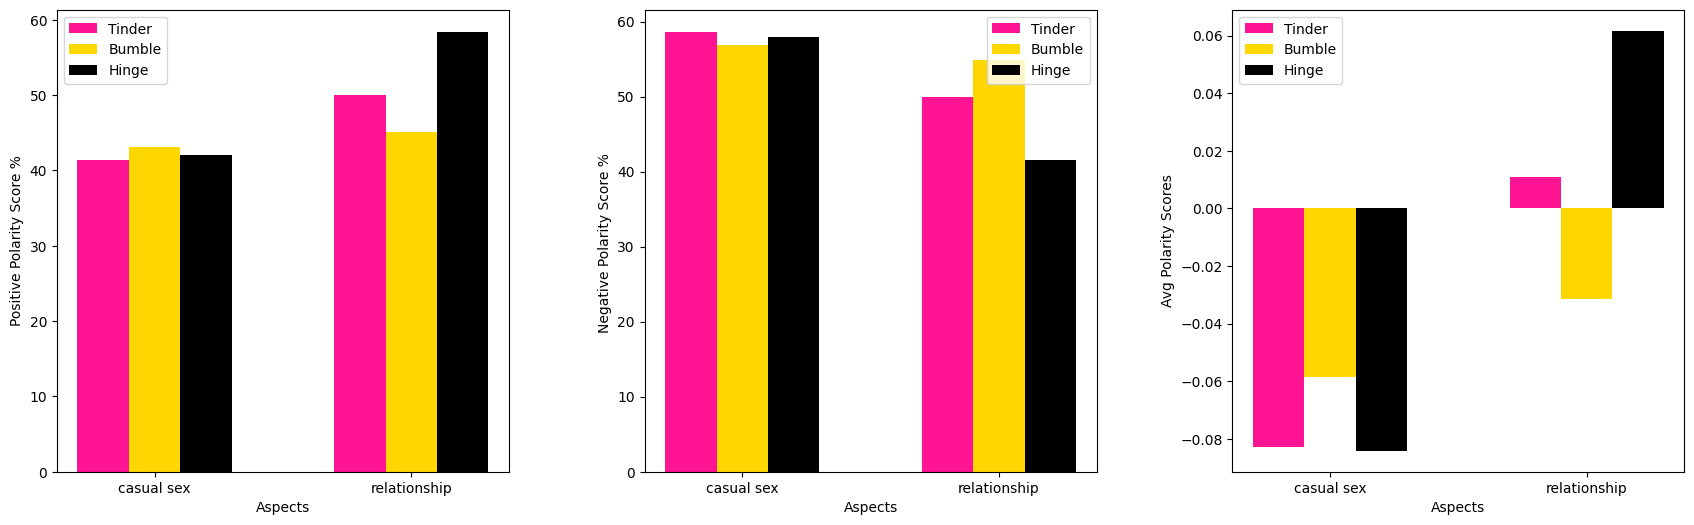

In [200]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects = ["casual sex", "relationship"], figsize=(21,6))

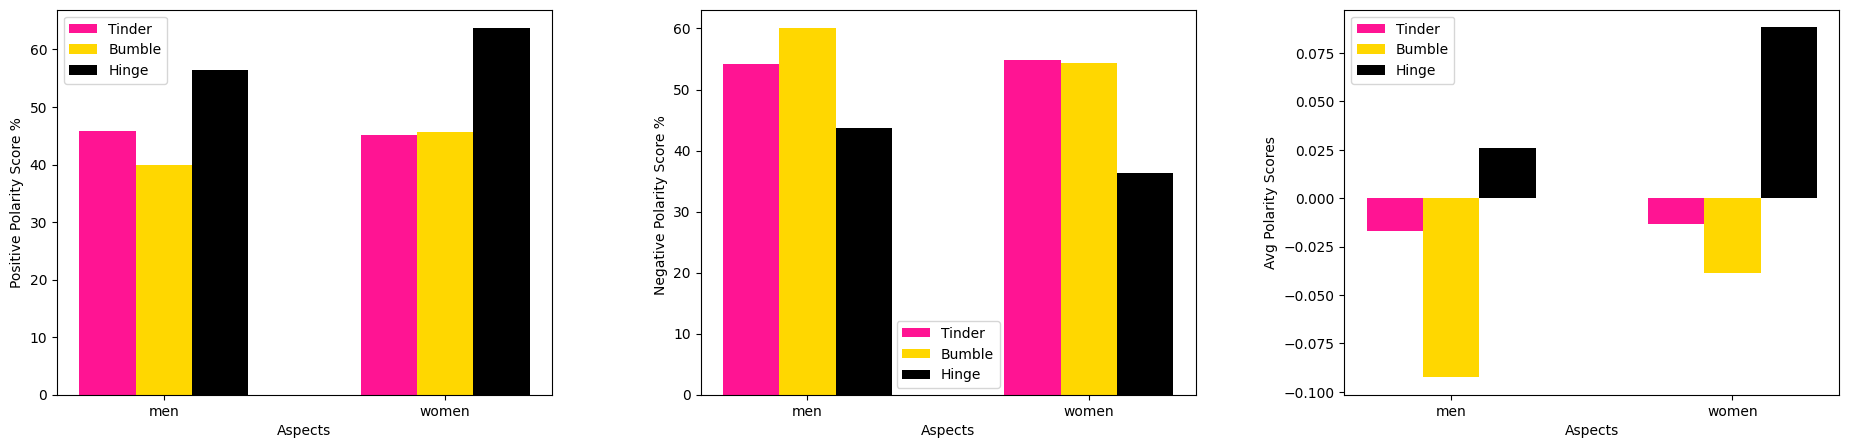

In [201]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["men", "women"], figsize=(23,5))

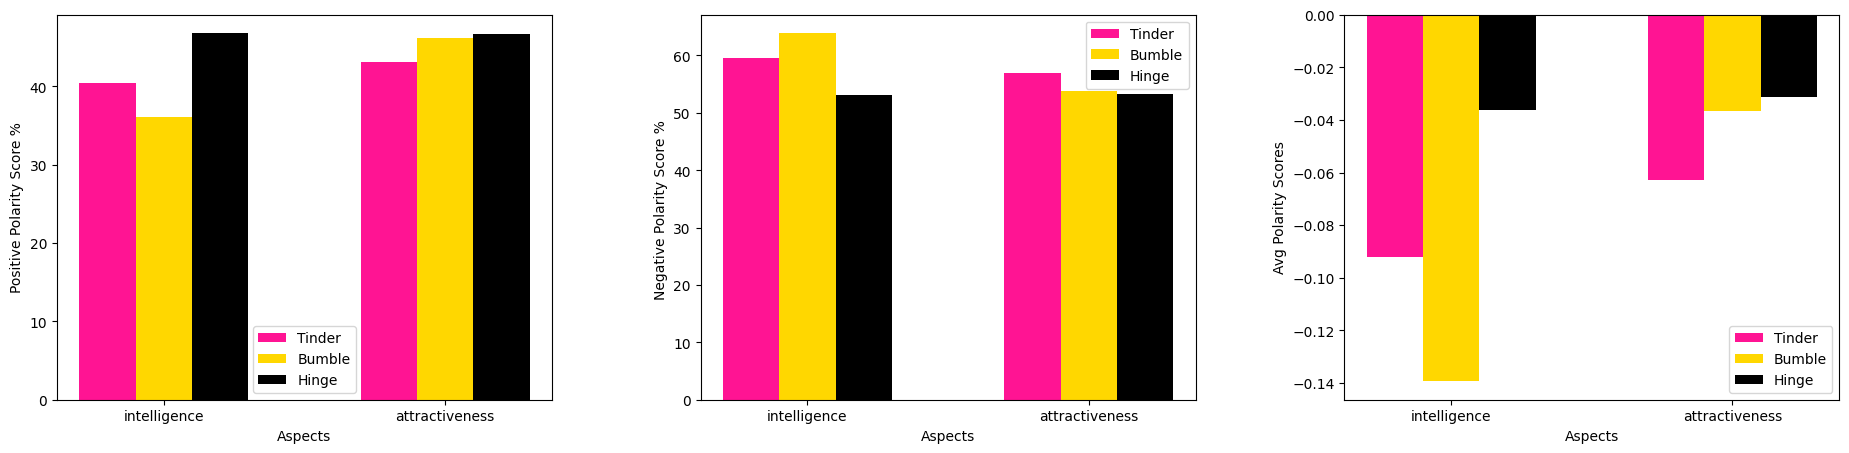

In [202]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["intelligence", "attractiveness"], figsize=(23,5))

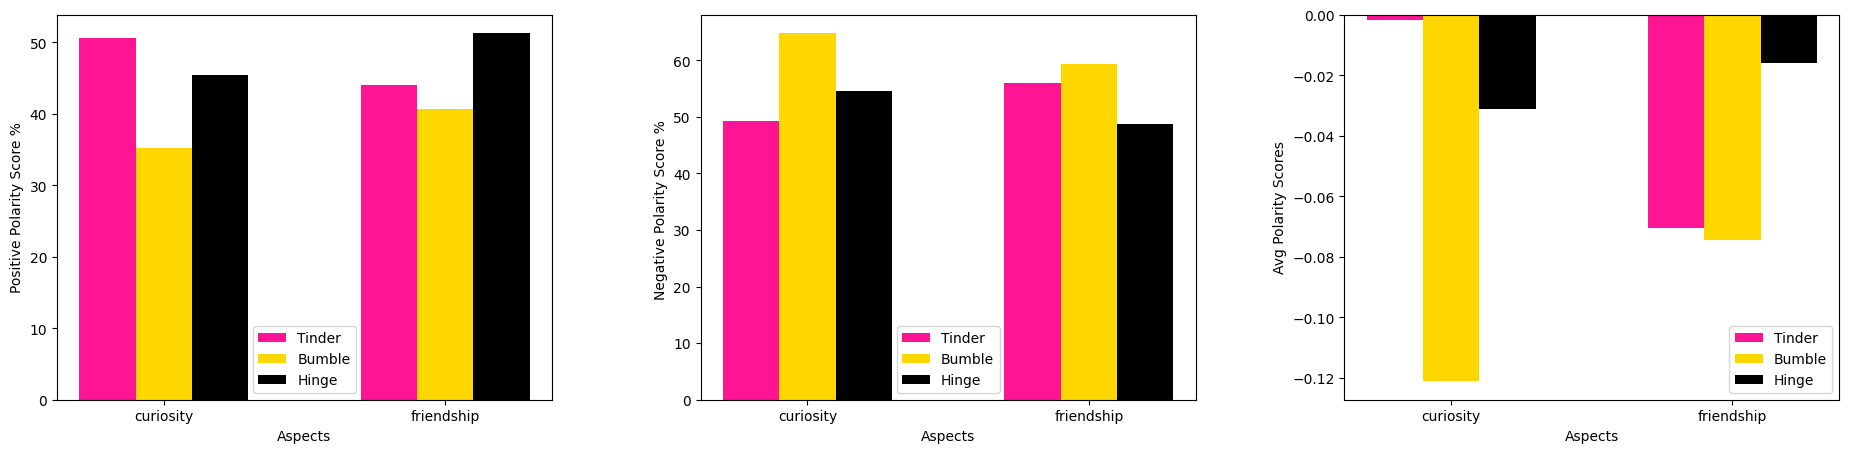

In [203]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["curiosity", "friendship"], figsize=(23,5))